# Logistic Regression

More information at: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression


## Metrics Classification

More detail at (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

The evelaution of perfomance ar based on the Confusion Matrix
- Accuracy
- Precision (P)
- Recall (R)
- F1 score (F1)
- Area under the ROC (Receiver Operating Characteristic) curve or simply Area Under Curve (AUC)
- Matthew Correlation Coefficient

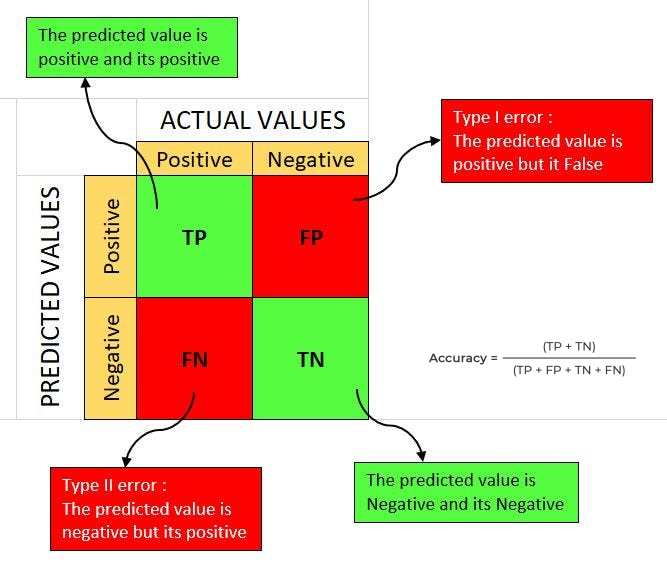

In [27]:
from IPython import display
display.Image("Image/ConfusionMatrix1.png")

### Micro/Macro Metrics

For multiclass classification we use Micro/Macro average.  A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric. In a multi-class classification setup, micro-average is preferable if you suspect there might be class imbalance (i.e you may have many more examples of one class than of other classes).

Nice tutorial at (https://iamirmasoud.com/2022/06/19/understanding-micro-macro-and-weighted-averages-for-scikit-learn-metrics-in-multi-class-classification-with-example/)


In [139]:
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.metrics import ConfusionMatrixDisplay

# we create two clusters of random points
n_samples = 1000
centers = 3
clusters_std = 4
X, y = make_blobs(
    n_samples=n_samples,
    n_features=2,
    centers=centers,
    cluster_std=clusters_std,
    random_state=42,
    shuffle=False,
)

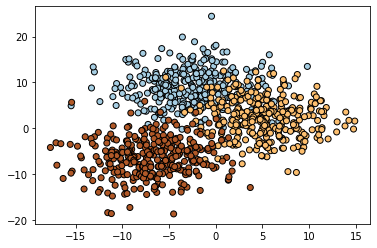

In [140]:
# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")

In [141]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [142]:
# fit the model and get the separating hyperplane
clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)

In [143]:
# Predict X_test
y_pred_test = clf.predict(X_test)

In [144]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       108
           1       0.87      0.86      0.87        95
           2       0.96      0.99      0.97        97

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



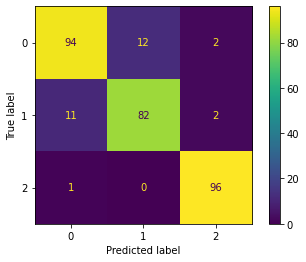

In [145]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)

## Balanced/UnBalanced Dataset

In [28]:
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs

# we create two clusters of random points
n_samples_1 = 10000
n_samples_2 = 1000
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(
    n_samples=[n_samples_1, n_samples_2],
    centers=centers,
    cluster_std=clusters_std,
    random_state=42,
    shuffle=False,
)

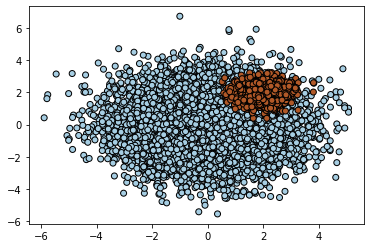

In [29]:
# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
# fit the model and get the separating hyperplane
clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)

In [32]:
# Predict X_test
y_pred_test = clf.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score, matthews_corrcoef

# Using Accuracy
print("Train Accuracy score: ", accuracy_score(y_train, y_pred_train))
print("Test Accuracy score: ", accuracy_score(y_test, y_pred_test))

Train Accuracy score:  0.9228571428571428
Test Accuracy score:  0.9318181818181818


In [34]:
# Using MCC
print("Train Accuracy score: ", matthews_corrcoef(y_train, y_pred_train))
print("Test Accuracy score: ", matthews_corrcoef(y_test, y_pred_test))

Train Accuracy score:  0.47658669233090256
Test Accuracy score:  0.539008793813582


Different startegy to deal with this problem
- Collecting more data
- Use the right evaluation metrics
- Under-sampling the majority class
- Over-sampling the minority class
- Cost in your Model definition

## Stratified Train Test Val Split

In [40]:
# import dataset aggregated dataset metadata
import json

with open('./Data/tutorial_metadata.json', 'r') as f:
    metadata = json.load(f)
    lines = f.readlines()

print(metadata.keys())

dict_keys(['pid', 'covariates', 'quality', 'total_hours', 'available_hours'])


In [41]:
import pandas as pd
newdf = pd.DataFrame(metadata)
newdf.head()

,pid,covariates,quality,total_hours,available_hours
0,ICARE_0284,"{'age': 53, 'female': 0, 'male': 1, 'other': 0...","[0.8684736661956489, 0.8684736661956489, 0.868...",72,17
1,ICARE_0286,"{'age': 85, 'female': 1, 'male': 0, 'other': 0...","[0.14386576470222, 0.14386576470222, 0.1438657...",72,17
2,ICARE_0296,"{'age': 48, 'female': 0, 'male': 1, 'other': 0...","[0.12318490277562366, 0.12318490277562366, 0.1...",72,3
3,ICARE_0299,"{'age': 45, 'female': 0, 'male': 1, 'other': 0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",72,23
4,ICARE_0303,"{'age': 51, 'female': 0, 'male': 1, 'other': 0...","[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",72,42


In [42]:
newdf["covariates"][0]

{'age': 53,
 'female': 0,
 'male': 1,
 'other': 0,
 'rosc': nan,
 'ohca': True,
 'vfib': True,
 'ttm': 33,
 'outcome': 0,
 'cpc': 1.0}

In [43]:
df1 = pd.DataFrame(metadata)
df2 = pd.DataFrame(metadata['covariates'])
df =pd.concat([df1, df2], axis=1, join="inner")
df.head()

,pid,covariates,quality,total_hours,available_hours,age,female,male,other,rosc,ohca,vfib,ttm,outcome,cpc
0,ICARE_0284,"{'age': 53, 'female': 0, 'male': 1, 'other': 0...","[0.8684736661956489, 0.8684736661956489, 0.868...",72,17,53.0,0,1,0,NaN,True,True,33.0,0,1.0
1,ICARE_0286,"{'age': 85, 'female': 1, 'male': 0, 'other': 0...","[0.14386576470222, 0.14386576470222, 0.1438657...",72,17,85.0,1,0,0,7.0,True,True,NaN,0,1.0
2,ICARE_0296,"{'age': 48, 'female': 0, 'male': 1, 'other': 0...","[0.12318490277562366, 0.12318490277562366, 0.1...",72,3,48.0,0,1,0,NaN,True,True,36.0,0,1.0
3,ICARE_0299,"{'age': 45, 'female': 0, 'male': 1, 'other': 0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",72,23,45.0,0,1,0,NaN,True,True,33.0,0,1.0
4,ICARE_0303,"{'age': 51, 'female': 0, 'male': 1, 'other': 0...","[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",72,42,51.0,0,1,0,24.0,True,True,33.0,0,1.0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              607 non-null    object 
 1   covariates       607 non-null    object 
 2   quality          607 non-null    object 
 3   total_hours      607 non-null    int64  
 4   available_hours  607 non-null    int64  
 5   age              606 non-null    float64
 6   female           607 non-null    int64  
 7   male             607 non-null    int64  
 8   other            607 non-null    int64  
 9   rosc             303 non-null    float64
 10  ohca             566 non-null    object 
 11  vfib             575 non-null    object 
 12  ttm              509 non-null    float64
 13  outcome          607 non-null    int64  
 14  cpc              607 non-null    float64
dtypes: float64(4), int64(6), object(5)
memory usage: 71.3+ KB


In [48]:
import numpy as np

# Delete NaN
df = df[df['age'].notna()]

# Binarize Age Data
df['AgeGroup'] = pd.cut(
    df["age"],
    bins=[-np.inf, 50, np.inf],
    labels=["50-", "51+"],
)
df.head()

/tmp/ipykernel_20856/1286740052.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AgeGroup'] = pd.cut(


,pid,covariates,quality,total_hours,available_hours,age,female,male,other,rosc,ohca,vfib,ttm,outcome,cpc,AgeGroup
0,ICARE_0284,"{'age': 53, 'female': 0, 'male': 1, 'other': 0...","[0.8684736661956489, 0.8684736661956489, 0.868...",72,17,53.0,0,1,0,NaN,True,True,33.0,0,1.0,51+
1,ICARE_0286,"{'age': 85, 'female': 1, 'male': 0, 'other': 0...","[0.14386576470222, 0.14386576470222, 0.1438657...",72,17,85.0,1,0,0,7.0,True,True,NaN,0,1.0,51+
2,ICARE_0296,"{'age': 48, 'female': 0, 'male': 1, 'other': 0...","[0.12318490277562366, 0.12318490277562366, 0.1...",72,3,48.0,0,1,0,NaN,True,True,36.0,0,1.0,50-
3,ICARE_0299,"{'age': 45, 'female': 0, 'male': 1, 'other': 0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",72,23,45.0,0,1,0,NaN,True,True,33.0,0,1.0,50-
4,ICARE_0303,"{'age': 51, 'female': 0, 'male': 1, 'other': 0...","[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",72,42,51.0,0,1,0,24.0,True,True,33.0,0,1.0,51+


In [49]:
# Print number of each age
print(len(df[df["AgeGroup"] == "50-"]))
print(len(df[df["AgeGroup"] == "51+"]))

136
470


In [50]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (Stratified Split)
train_data, test_data_ = train_test_split(df, test_size=0.3, random_state=42, stratify=df[["outcome", "female", "AgeGroup"]])
val_data, test_data = train_test_split(test_data_, test_size=0.5, random_state=42, stratify=test_data_[["outcome", "female", "AgeGroup"]])

print(len(train_data[train_data["outcome"] == 0]))
print(len(train_data[train_data["outcome"] == 1]))
print(len(val_data[val_data["outcome"] == 0]))
print(len(val_data[val_data["outcome"] == 1]))
print(len(test_data[test_data["outcome"] == 0]))
print(len(test_data[test_data["outcome"] == 1]))

156
268
34
57
34
57


In [52]:
# Create a Deliverable table
data = [[len(train_data)/len(df), len(train_data[train_data["outcome"] == 0])/len(train_data)],
        [len(val_data)/len(df), len(val_data[val_data["outcome"] == 0])/len(val_data)],
        [len(test_data)/len(df), len(test_data[test_data["outcome"] == 0])/len(test_data)]]

# Create the pandas DataFrame with column name is provided explicitly
df_Final = pd.DataFrame(data, columns=['Percentage of Patient', 'Percentace of Not Recovery'])
df_Final

,Percentage of Patient,Percentace of Not Recovery
0,0.699670,0.367925
1,0.150165,0.373626
2,0.150165,0.373626


## Cross Validation

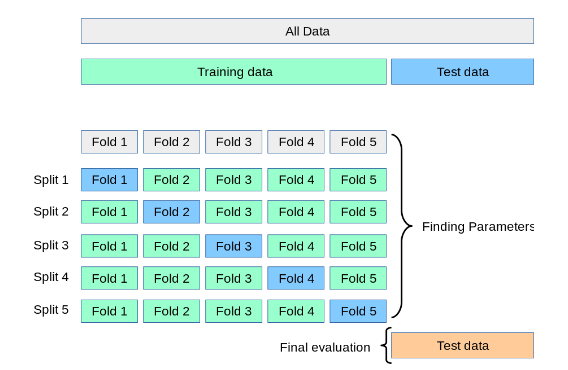

In [54]:
display.Image("Image/CrossValidation.png")

In [60]:
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

X, y = make_classification(
    n_samples=1000,
    n_features=5,
    n_informative=3,
    n_classes=2,
    random_state=42
)

In [92]:
# Define classifier
clf = LogisticRegression(penalty=None)

In [93]:
# Split data in Train and Test
X_, X_test, y_, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Stratified KFold
cv = StratifiedKFold(5, shuffle=True, random_state=42)

for cv_ind, (train, val) in enumerate(cv.split(X_, y_)):
    clf.fit(X_[train], y_[train])
    y_pred_val = clf.predict(X_[val])
    print("Validation Accuracy score: ", accuracy_score(y_[val], y_pred_val))


y_pred_test = clf.predict(X_test)
print("Test Accuracy score: ", accuracy_score(y_test, y_pred_test))

Validation Accuracy score:  0.8642857142857143
Validation Accuracy score:  0.8714285714285714
Validation Accuracy score:  0.9214285714285714
Validation Accuracy score:  0.8714285714285714
Validation Accuracy score:  0.9428571428571428
Test Accuracy score:  0.9266666666666666


In [94]:
# Split data in Train and Test
X_, X_test, y_, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Stratified KFold
cv = StratifiedKFold(5, shuffle=True, random_state=42)

# Parameter for GridSearch
parameters = {'penalty':('l2', None)}

search = GridSearchCV(clf,
                   parameters,
                   cv=cv,
                   refit=False
                   )

# Thsi do the same as refit=True
search.fit(X_, y_)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(penalty=None),
             param_grid={'penalty': ('l2', None)}, refit=False)

In [91]:
clf_final = clf.set_params(**search.best_params_)
y_pred_test = clf.predict(X_test)
print("Test Accuracy score: ", accuracy_score(y_test, y_pred_test))

Test Accuracy score:  0.9233333333333333


## Iris dataset

In [95]:
#necessary imports
import time
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [96]:
# loading the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [97]:
myLogReg = Pipeline(steps=[
    ("StandardScaler", StandardScaler()),
    ("LogReg", LogisticRegression())
])

### Classification in 2 classes

In [98]:
# we first extract the classes 0 and 1 from the dataset
Xbin = X[y<2]
ybin = y[y<2]

In [99]:
# split train/test dataset
X_train, X_test, y_train, y_test = train_test_split(Xbin, ybin, test_size=0.3)

In [100]:
# Fit
myLogReg.fit(X_train,y_train)

Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('LogReg', LogisticRegression())])

F1 score :  1.0


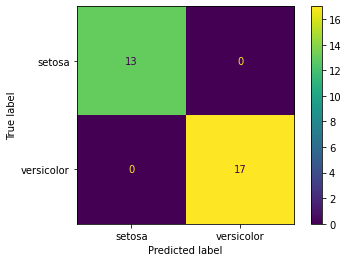

In [101]:
# evaluation
y_pred_test = myLogReg.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, display_labels=iris.target_names[0:2])

print("F1 score : ", f1_score(y_test,y_pred_test))

### all classes from Iris dataset

In [103]:
# split train/test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [104]:
#learning
myLogReg.fit(X_train,y_train)

Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('LogReg', LogisticRegression())])

F1 score :  [1.         0.96       0.96296296]


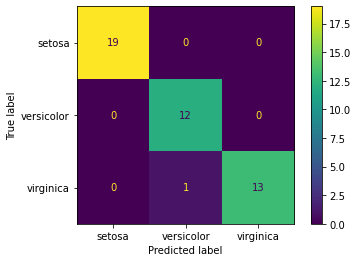

In [106]:
# evaluation
y_pred_test = myLogReg.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, display_labels=iris.target_names)

print("F1 score : ", f1_score(y_test, y_pred_test, average=None))

## MNIST dataset

In [107]:
# reading the dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


2023-07-24 18:18:31.810166: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-24 18:18:31.927505: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-24 18:18:31.927519: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-07-24 18:18:33.119612: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

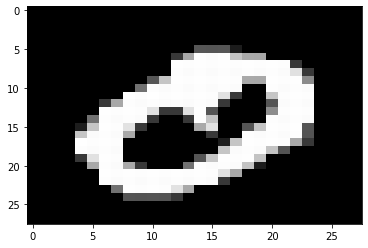

The true class is :  0


In [108]:
#display randomly one of the pictures

i = randint(0,len(y_train)-1)
plt.imshow(x_train[i],aspect="auto",cmap='gray')
plt.show()
print("The true class is : ", y_train[i])

In [109]:
# reshaping the data (a 2d image is transformed to a 1d array)
#train
n = x_train.shape[0]
x_trainLin = x_train.reshape(n,-1)
#test
n = x_test.shape[0]
x_testLin = x_test.reshape(n,-1)

In [ ]:
# Creation of Pipeline

#your work

In [ ]:
# Case of binary classification: let's choose 2 classes among the 10 classes: the 4's and the 8's

#your work

In [ ]:
# Learn of logistic regressions

#your work

In [ ]:
# Compute and display the f1 score and the confusion matrix

#your work

The logistic regression has been build with default parameters. Follow the recommandation and try different hints:
- algorithm terminaison: max number of iterations, ....
- data preprocessing: standardisation YES
- solver (liblinear, sag, saga, ...)
- regularisation

Did you get better results ? Did some converge faster ?

### The whole dataset with the 10 classes

In [ ]:
# Same work as the binary classification but now using the whole dataset with the 10 classes

## Do you obtain the same results with FMNIST ? (fashion MNIST)

In [ ]:
# your turn!